In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Variance of normal RV-s

Create a large sample (>= 1000) of standard random numbers.  Compute
the sample variance using both of the formulas, and by the np.var method.

In [3]:
n = 1000
x = np.random.normal(size=(n))
barx = x.mean()
print("mean:", barx)
print(np.mean(x))
vx = np.mean((x - x.mean())**2)
print("variance:", vx)
vx2 = np.mean(x*x) - np.mean(x)**2
print("variance 2:", vx2)
vx3 = x.var()
print("variance 3:", vx3)
sdx = np.sqrt(vx3)
print("st.dev:", sdx)

mean: -0.002006138952698099
-0.002006138952698099
variance: 0.959530659425031
variance 2: 0.9595306594250308
variance 3: 0.959530659425031
st.dev: 0.9795563584730748


Compute the confidence intervals: $[mean - 1.96*std, mean +
                                    1.96*std]$.  Given the confidence
intervals, find which percentage of the sample falls outside of the interval.

In [4]:
x1 = barx - 1.96*sdx
x2 = barx + 1.96*sdx
outside = np.logical_or(x < x1, x > x2)
print("outside pct:", outside.mean())

outside pct: 0.043


All results are exactly the same, i.e. numpy uses a similar formula
for the variance.  Also, the results are terribly close to 1, which is
not surprising as we picked the standard normals.

## 2. Variance of means

Do a similar exercise, just instead of random numbers, pick means of a
random sample (of size $n$ = 1, 3, 10, 30, ..., 1000, ... as far as your
               computer can go).
* How big is the variance of these means?
* what is the confidence interval?
* what percentage of observations fall outside of the interval?
* how does all that depend on the sample size $n$?

In [5]:
n = 1
m = 1000
mu = np.random.normal(size=(m,n)).mean(axis=1)
print("var(mu):", mu.var())
barx = mu.mean()
std = np.sqrt(mu.var())
x1 = barx - 1.96*std
x2 = barx + 1.96*std
print("confidence interval:", x1, x2)
inside = np.logical_and(mu >= x1, mu <= x2)
print("inside pct:", inside.mean())


var(mu): 0.9970136434639529
confidence interval: -1.9469587029664934 1.967183661706065
inside pct: 0.949


Now write it as a function

In [6]:
def meansamples(m, n):
    mu = np.random.normal(size=(m,n)).mean(axis=1)
    barx = mu.mean()
    std = np.sqrt(mu.var())
    x1 = barx - 1.96*std
    x2 = barx + 1.96*std
    inside = np.logical_and(mu >= x1, mu <= x2).mean()
    return (x1, x2, inside)
meansamples(1000,100000)    

(-0.006234979538176967, 0.006271910670392052, 0.951)

           lower    pct     upper
1.0     1.932165  0.955  1.932165
3.0     1.129630  0.952  1.129630
10.0    0.634324  0.957  0.634324
30.0    0.375213  0.955  0.375213
100.0   0.185759  0.961  0.185759
300.0   0.116558  0.957  0.116558
1000.0  0.061320  0.952  0.061320
3000.0  0.036494  0.952  0.036494


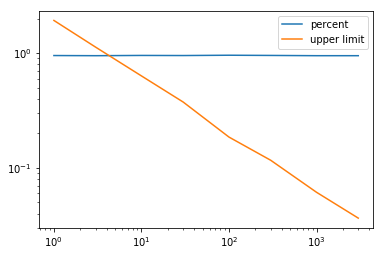

In [7]:
ns = np.array([1, 3, 10, 30, 100, 300, 1000, 3000], dtype="float")
pcts = np.empty_like(ns)
lowers = np.empty_like(ns)
uppers = np.empty_like(ns)
for i, n in enumerate(ns):
    l, u, pct = meansamples(m, int(n))
    pcts[i] = pct
    lowers[i] = u
    uppers[i] = u

data = pd.DataFrame({"lower": lowers, "upper": uppers, "pct": pcts},
                    index=ns)
print(data)
plt.loglog(ns, pcts, label='percent')
plt.loglog(ns, uppers, label='upper limit')
plt.legend()

Comment: pct is the same, interval falls rapidly.

## 3. extra task

In [9]:
def meansamples2(m, n):
    mu = np.random.normal(size=(m,n)).cumsum(axis=1).mean(axis=1)
    barx = mu.mean()
    std = np.sqrt(mu.var())
    x1 = barx - 1.96*std
    x2 = barx + 1.96*std
    inside = np.logical_and(mu >= x1, mu <= x2).mean()
    print(x1, x2)
    return (x1, x2, inside)

meansamples2(100,100)

-10.797232799733463 11.848523715901353


(-10.797232799733463, 11.848523715901353, 0.94)

-1.8894083422932686 1.8737305657159273
-2.480840284541944 2.414866494387119
-4.029041023977701 3.9067470479572237
-6.2883429670043 6.372703511061293
-11.458678239246105 11.489980998339352
-19.392033249397322 19.003177000551638
-35.07553984951828 34.94992878763047
-61.19572745588588 63.22042735878548
            lower    pct      upper
1.0     -1.889408  0.952   1.873731
3.0     -2.480840  0.946   2.414866
10.0    -4.029041  0.950   3.906747
30.0    -6.288343  0.954   6.372704
100.0  -11.458678  0.950  11.489981
300.0  -19.392033  0.955  19.003177
1000.0 -35.075540  0.947  34.949929
3000.0 -61.195727  0.953  63.220427


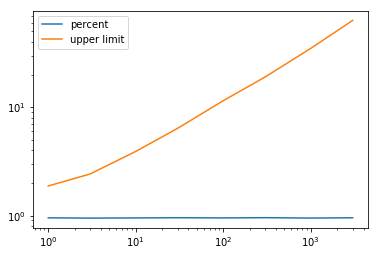

In [11]:
ns = np.array([1, 3, 10, 30, 100, 300, 1000, 3000], dtype="float")
pcts = np.empty_like(ns)
lowers = np.empty_like(ns)
uppers = np.empty_like(ns)
for i, n in enumerate(ns):
    l, u, pct = meansamples2(m, int(n))
    pcts[i] = pct
    lowers[i] = l
    uppers[i] = u

data = pd.DataFrame({"lower": lowers, "upper": uppers, "pct": pcts},
                    index=ns)
print(data)
plt.loglog(ns, pcts, label='percent')
plt.loglog(ns, uppers, label='upper limit')
plt.legend()

Now the upper limit is increasing...